### Initialization

In [1]:
import tensorflow as tf
import numpy as np
import os
import glob
import scipy.misc as misc
from utils import *

### Inference

In [3]:
keep_probability = tf.placeholder(tf.float32, name="keep_probabilty")
image = tf.placeholder(tf.float32, shape=[None, None, None, 3], name="input_image")
annotation = tf.placeholder(tf.int32, shape=[None, None, None, 1], name="annotation")

pred_annotation, logits = inference(image, keep_probability) # logits: probability map

### Checkpoint loading

In [4]:
sess = tf.Session()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

ckpt = os.path.join(os.getcwd(), 'logs', 'model.ckpt')
saver.restore(sess, ckpt)

### Image samples

In [55]:
img_name = 'B79428571_B79428581_1_PLACE2_SLABNUM2_EXIST11_TYPE11'
# img_name = 'B79625551_B79625061_1_PLACE3_SLABNUM2_EXIST11_TYPE11'
# img_name = 'B79875551_B79875061_1_PLACE1_SLABNUM2_EXIST11_TYPE11'
# img_name = 'B82695031_B82695561_B82695051_1_PLACE3_SLABNUM3_EXIST111_TYPE111'
# img_name = 'B83540041_B83540551_1_PLACE2_SLABNUM2_EXIST11_TYPE11'
# img_name = 'B85350541_1_EXIST1_PLACE2_SLABNUM1_TYPE1'
# img_name = 'B88561551_B88561581_B88561081_1_EXIST111_PLACE1_SLABNUM3_TYPE111_FONT2'
# img_name = 'B89051091_B89051581_1_EXIST11_PLACE2_SLABNUM2_TYPE11'
# img_name = 'B89470071_B89470581_B89470051_1_EXIST111_PLACE1_SLABNUM3_TYPE111'
# img_name = 'B91255561_B91255061_1_EXIST11_PLACE1_SLABNUM2_TYPE11'

image_dir = os.getcwd()+'/images'
img_path = os.path.join(image_dir, img_name+'.jpg')

### FCN prediction

In [56]:
img = misc.imread(img_path)        
img = misc.imresize(img,0.5)
img = np.expand_dims(img,axis=0)

pred = sess.run(pred_annotation, feed_dict={image: img, keep_probability: 1.0})
pred = np.squeeze(pred)

misc.imsave(os.path.join(image_dir, "pred_"+img_name+".png"), (20*pred).astype(np.uint8))

### Transcription

In [57]:
slab_positions = pred_img2slab_position(pred, thr=0)
predicted_SINs = pred_img2SINs(pred, slab_positions)

### Visualization

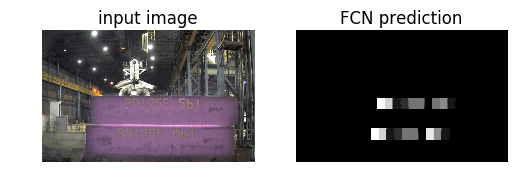

Predicted SINs: 
B91255061
B91255561


In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(np.squeeze(img))
ax1.axis('off')
ax1.set_title('input image')
ax2.imshow(pred, cmap=plt.cm.gray) 
ax2.axis('off')
ax2.set_title('FCN prediction')
plt.show()

print('Predicted SINs: ')
for SIN in predicted_SINs:
    print(SIN)